<a href="https://colab.research.google.com/github/ucfilho/Disciplina_Metodos_Numericos_2020/blob/master/Mod_03_class_09_ode_pendulum_out_13_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/ucfilho/Disciplina_Metodos_Numericos_2020 #clonar do Github
%cd Disciplina_Metodos_Numericos_2020

Cloning into 'Disciplina_Metodos_Numericos_2020'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 535 (delta 81), reused 0 (delta 0), pack-reused 385
Receiving objects: 100% (535/535), 726.20 KiB | 1.01 MiB/s, done.
Resolving deltas: 100% (305/305), done.
/content/Disciplina_Metodos_Numericos_2020


In [3]:
# problem pendulum using rk4- please compare Mod_03_class_03_double_pendulum.ipynb

In [4]:
from edo_rk4 import rk4


pi=np.pi
g = 9.82
L = 0.5
m = 0.1
def model(x, t):
  """
  The right-hand side of the pendulum ODE
  """
  x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
  dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
  dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
  dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
  dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
  return [dx1, dx2, dx3, dx4]



In [5]:
# initial state
x0 = [pi/4, pi/2, 0, 0]
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = np.linspace(0, 10, 250)
dt=t[1]-t[0]

In [6]:
# compute various numerical solutions
x = rk4( model, x0, t )


In [7]:
a=np.array([x0])
b=a+0.5*a;print(b)

[[1.17809725 2.35619449 0.         0.        ]]


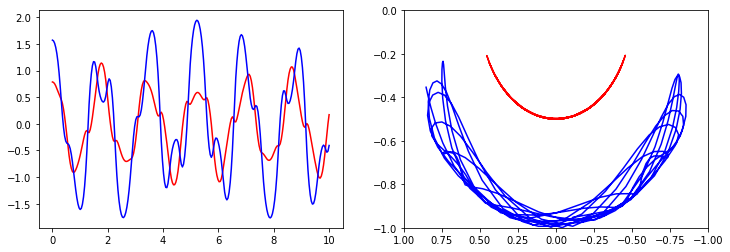

In [8]:
# plot the angles as a function of time
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")
x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])
x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);